A recent research paper titled **“KAN: Kolmogorov–Arnold Network”** approach challenges the conventional wisdom of Multi-Layer Perceptron (MLPs). It's concept lies the Kolmogorov-Arnold representation theorem, a mathematical theory developed by Vladimir Arnold and Andrey Kolmogorov. This theorem asserts that complex multivariate functions can be decomposed into simpler one-dimensional functions, laying the foundation for KANs’ unique structure.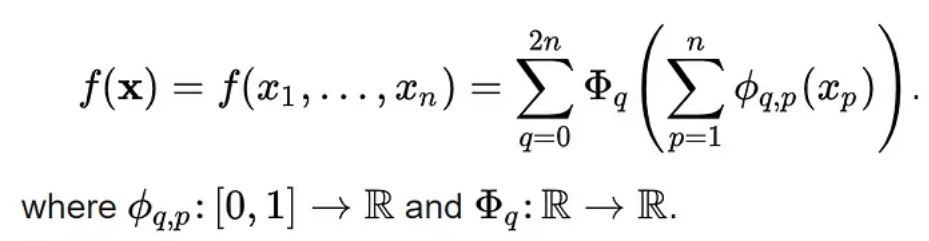

This Notebook is me, trying to explore and understand KANs.

In [10]:
# Clone the repository
!git clone https://github.com/KindXiaoming/pykan.git

# Change directory to the cloned repository and install the package
!cd pykan && pip install -e .


Cloning into 'pykan'...
remote: Enumerating objects: 2019, done.
remote: Counting objects: 100% (283/283), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 2019 (delta 251), reused 203 (delta 198), pack-reused 1736
Receiving objects: 100% (2019/2019), 17.31 MiB | 20.15 MiB/s, done.
Resolving deltas: 100% (657/657), done.
Obtaining file:///content/pykan
  Preparing metadata (setup.py) ... done
  Running setup.py develop for pykan


In [23]:
!pip install pykan


In [1]:
!pip install kan

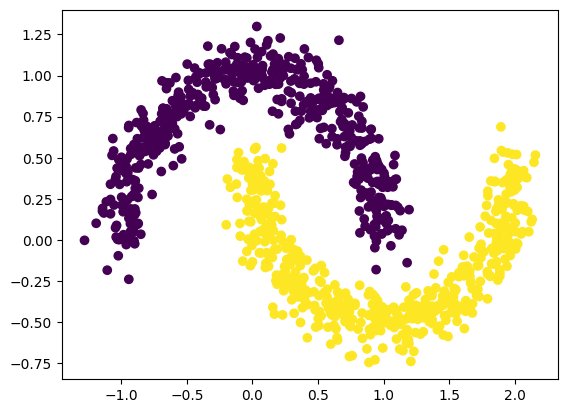

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
import numpy as np

dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input)
dataset['test_input'] = torch.from_numpy(test_input)
dataset['train_label'] = torch.from_numpy(train_label)
dataset['test_label'] = torch.from_numpy(test_label)

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:])

In [22]:
from kan import *
from pykan import *


In [21]:

from pykan import KAN

ImportError: cannot import name 'KAN' from 'pykan' (unknown location)

In [25]:
# create a KAN: 2D inputs, 2D output, and no hidden neurons. cubic spline (k=3), 3 grid intervals (grid=3).
model = KAN(width=[2,2], grid=3, k=3)

def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']),
    dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']),
    dim=1) == dataset['test_label']).float())

results = model.train(dataset, opt="LBFGS", steps=20,
          metrics=(train_acc, test_acc),
          loss_fn=torch.nn.CrossEntropyLoss())

NameError: name 'PYKAN' is not defined

In [ ]:
# Obtaining the Symbolic Formula from the Model
# After this, a symbolic formula is derived that represents what the model has learned from the data.

formula1, formula2 = model.symbolic_formula()[0]

In [ ]:
# Calculating the accuracy:

def acc(formula1, formula2, X, y):
    batch = X.shape[0]
    correct = 0
    for i in range(batch):

        logit1 = np.array(formula1.subs('x_1',
                          X[i,0]).subs('x_2', X[i,1])).astype(np.float64)
        logit2 = np.array(formula2.subs('x_1', X[i,0]).subs('x_2',
                          X[i,1])).astype(np.float64)

        correct += (logit2 > logit1) == y[i]

    return correct/batch

# Print Accuracy
print('train acc of the formula:', acc(formula1,
                                       formula2,
                                       dataset['train_input'],
                                       dataset['train_label']))

print('test acc of the formula:', acc(formula1,
                                      formula2,
                                      dataset['test_input'],
                                      dataset['test_label']))

In [27]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [28]:
# Install Git
!apt-get install git -y

# Configure Git with your GitHub username and email
!git config --global user.name "abhiverse01"
!git config --global user.email "www.abhishekshah007@gmail.com"

# Store your GitHub token securely (this method is for demonstration; in a real scenario, use more secure methods)
import os
os.environ['GITHUB_TOKEN'] = ''


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [29]:

!git clone https://{os.environ['GITHUB_TOKEN']}@github.com/abhiverse01/Understanding-Kolmogorov-Arnold-Networks--KANs-.git


Cloning into 'Understanding-Kolmogorov-Arnold-Networks--KANs-'...


In [30]:
notebook_name = "Understanding-Kolmogorov–Arnold-Networks-(KANs).ipynb"
repo_path = "/content/your_repository"

# Save the notebook
!cp /content/{notebook_name} {repo_path}


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `cp /content/Understanding-Kolmogorov–Arnold-Networks-(KANs).ipynb /content/your_repository'


In [31]:
import subprocess

def run_shell_command(command):
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    out, err = process.communicate()
    return out, err

# Navigate to the repository directory
os.chdir(repo_path)

# Add changes
run_shell_command("git add .")

# Commit changes
run_shell_command('git commit -m "Updated notebook"')

# Push changes
run_shell_command(f"git push https://{os.environ['GITHUB_TOKEN']}@github.com/your_github_username/your_repository.git")


FileNotFoundError: [Errno 2] No such file or directory: '/content/your_repository'